In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
df= pd.read_excel("/content/financial_loan_data_excel.xlsx")

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
df.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,datetime64[ns]
last_credit_pull_date,datetime64[ns]
last_payment_date,datetime64[ns]


# **Total _ Loan_ Application**

In [5]:
total_loan_application= df['id'].count()
print("Total Loan Applications:", total_loan_application)

Total Loan Applications: 38576


# **MTD_Loan_Application**

In [6]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[
    (df['issue_date'].dt.year == latest_year) &
    (df['issue_date'].dt.month == latest_month)
]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications(for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")



MTD Loan Applications(for December 2021): 4314


# ***Total Funded Amount***

In [7]:
Total_Funded_Amount= df['loan_amount'].sum()
Total_Funded_Amount_in_millions= Total_Funded_Amount/1000000
print("Total Funded Amount: ${:.2f}M".format(Total_Funded_Amount_in_millions))

Total Funded Amount: $435.76M


# ***MTD Funded Amount***

In [8]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[
    (df['issue_date'].dt.year == latest_year) &
    (df['issue_date'].dt.month == latest_month)
]

mtd_funded_amount = mtd_data['loan_amount'].sum()
mtd_funded_amount_in_millions= mtd_funded_amount/1000000

print("MTD Funded Amount: ${:.2f}M".format(mtd_funded_amount_in_millions))

MTD Funded Amount: $53.98M


# ***Total Payment Received***

In [9]:
Total_Payment_Received= df['total_payment'].sum()
Total_Payment_Received_in_millions= Total_Payment_Received/1000000
print("Total Funded Amount: ${:.2f}M".format(Total_Payment_Received_in_millions))

Total Funded Amount: $473.07M


# ***Average Interest Rate***

In [10]:
average_interest_rate= df['int_rate'].mean()*100
print("Average Interest Rate: {:.2f}%".format(average_interest_rate))

Average Interest Rate: 12.05%


# ***Average DTI***

In [11]:
average_dti= df['dti'].mean()*100
print("Average DTI: {:.2f}%".format(average_dti))

Average DTI: 13.33%


# **Good Loan Metrics**

In [12]:
good_loans= df[df['loan_status'].isin(["Fully Paid","Current"])]
total_loan_application= df['id'].count()

good_loan_applications= good_loans['id'].count()
good_loan_funded_amount= good_loans['loan_amount'].sum()
good_loan_payment_received= good_loans['total_payment'].sum()

good_loan_funded_amount_in_millions= good_loan_funded_amount/1000000
good_loan_payment_received_in_millions= good_loan_payment_received/1000000

good_loan_percentage= (good_loan_applications/ total_loan_application)*100

print("Good Loan Applications :", good_loan_applications)
print("Good Loan Funded Amount in millions :${:.2f}M".format(good_loan_funded_amount_in_millions))
print("Good Loan Payment Received in millions :${:.2f}M".format(good_loan_payment_received_in_millions))
print("Good Loan Percentage :${:.2f}M".format(good_loan_percentage))

Good Loan Applications : 33243
Good Loan Funded Amount in millions :$370.22M
Good Loan Payment Received in millions :$435.79M
Good Loan Percentage :$86.18M


# **Bad Loan Metrics**

In [13]:
bad_loans= df[df['loan_status'].isin(["Charged Off"])]
total_loan_application= df['id'].count()

bad_loan_applications= bad_loans['id'].count()
bad_loan_funded_amount= bad_loans['loan_amount'].sum()
bad_loan_payment_received= bad_loans['total_payment'].sum()

bad_loan_funded_amount_in_millions= bad_loan_funded_amount/1000000
bad_loan_payment_received_in_millions= bad_loan_payment_received/1000000

bad_loan_percentage= (bad_loan_applications/ total_loan_application)*100

print("Bad Loan Applications :", bad_loan_applications)
print("Bad Loan Funded Amount in millions :${:.2f}M".format(bad_loan_funded_amount_in_millions))
print("Bad Loan Payment Received in millions :${:.2f}M".format(bad_loan_payment_received_in_millions))
print("Bad Loan Percentage :${:.2f}M".format(bad_loan_percentage))

Bad Loan Applications : 5333
Bad Loan Funded Amount in millions :$65.53M
Bad Loan Payment Received in millions :$37.28M
Bad Loan Percentage :$13.82M


# **Monthly Trends by Issue Date  for Total Funded Amount**

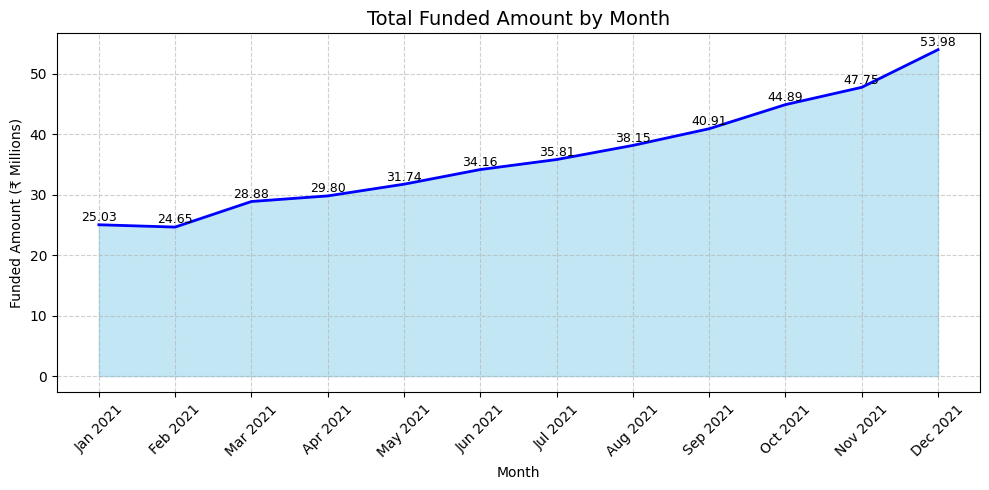

In [14]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1_000_000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'],
                 monthly_funded['loan_amount_millions'],
                 color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'],
         monthly_funded['loan_amount_millions'],
         color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1,
             f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (₹ Millions)')
plt.xticks(ticks=range(len(monthly_funded)),
           labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Monthly Trends by Issue Date for Total Amount Received**

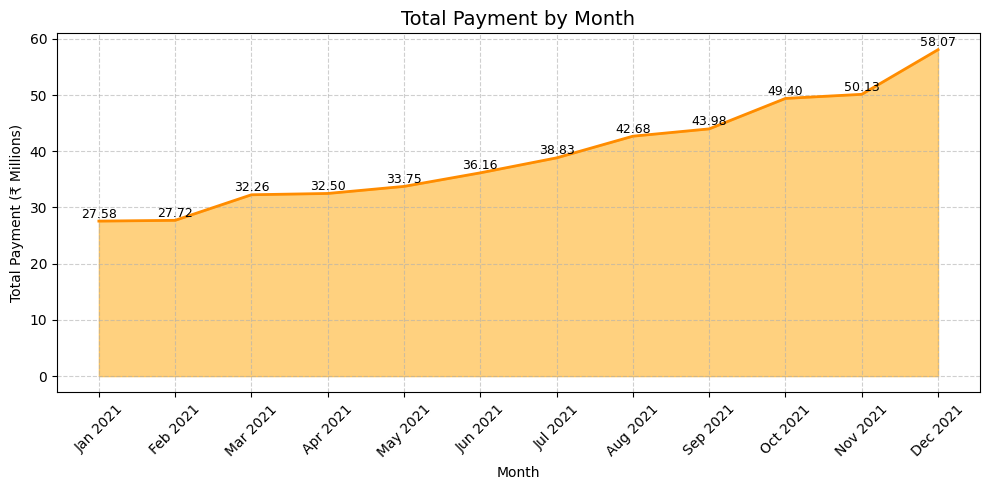

In [15]:
# Grouping by month for total payment
monthly_payment = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1_000_000)
      .reset_index(name='total_payment_millions')
)

# Plotting total payment by month
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_payment['month_name'],
                 monthly_payment['total_payment_millions'],
                 color='orange', alpha=0.5)
plt.plot(monthly_payment['month_name'],
         monthly_payment['total_payment_millions'],
         color='darkorange', linewidth=2)

# Annotate each point with the value
for i, row in monthly_payment.iterrows():
    plt.text(i, row['total_payment_millions'] + 0.1,
             f"{row['total_payment_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Payment by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Payment (₹ Millions)')
plt.xticks(ticks=range(len(monthly_payment)),
           labels=monthly_payment['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Monthly Trends by Issue Date for Total Loan Applications**

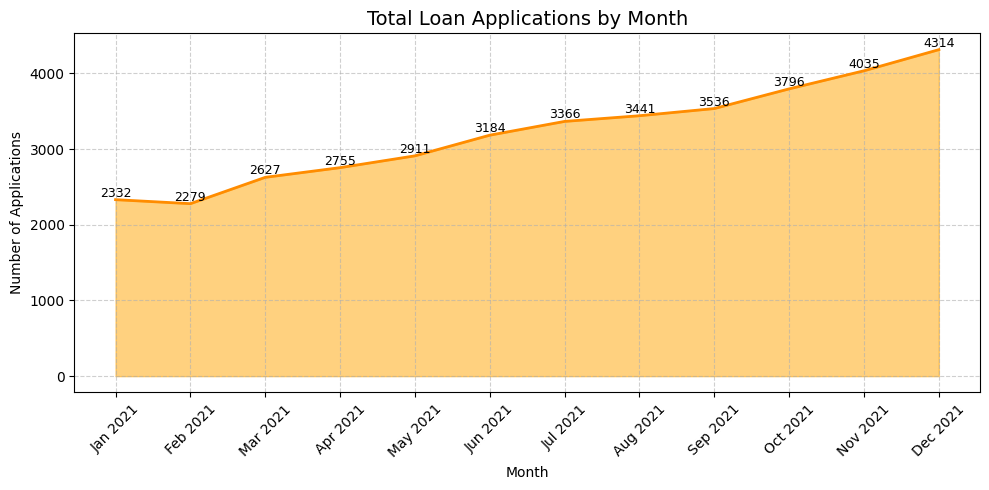

In [16]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'],
                 monthly_applications['loan_applications_count'],
                 color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'],
         monthly_applications['loan_applications_count'],
         color='darkorange', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5,
             f"{row['loan_applications_count']}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_applications)),
           labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Regional Analysis By State For Total Funded Amount**

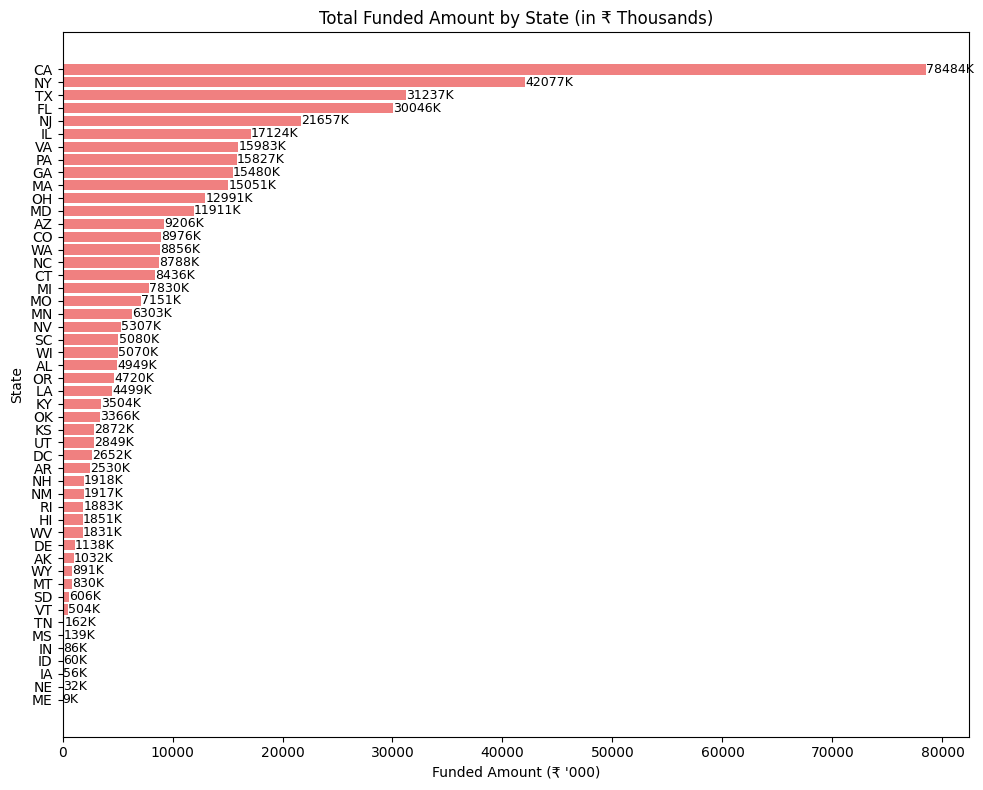

In [17]:
# Grouping by state for total funded amount
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000  # convert to thousands

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

# Annotating each bar with value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}K',
             va='center', fontsize=9)

plt.title('Total Funded Amount by State (in ₹ Thousands)')
plt.xlabel('Funded Amount (₹ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


# **Loan Term Analysis By Total Funded Amount**

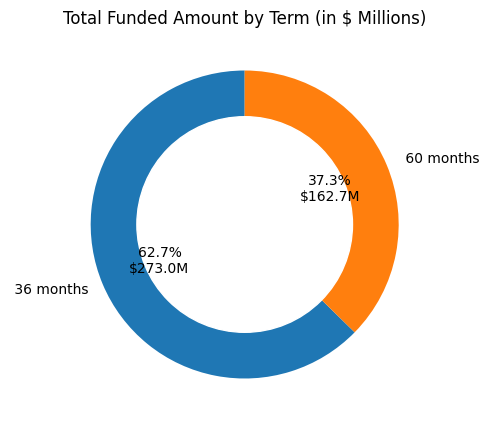

In [18]:
# Grouping by term for total funded amount
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1_000_000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f'{p:.1f}%\n${p * sum(term_funding_millions)/100:.1f}M',
    startangle=90,
    wedgeprops={'width': 0.4}
)

# Adding white circle to make it a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))

plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()


# **Employee Length By Total Funded Amount**

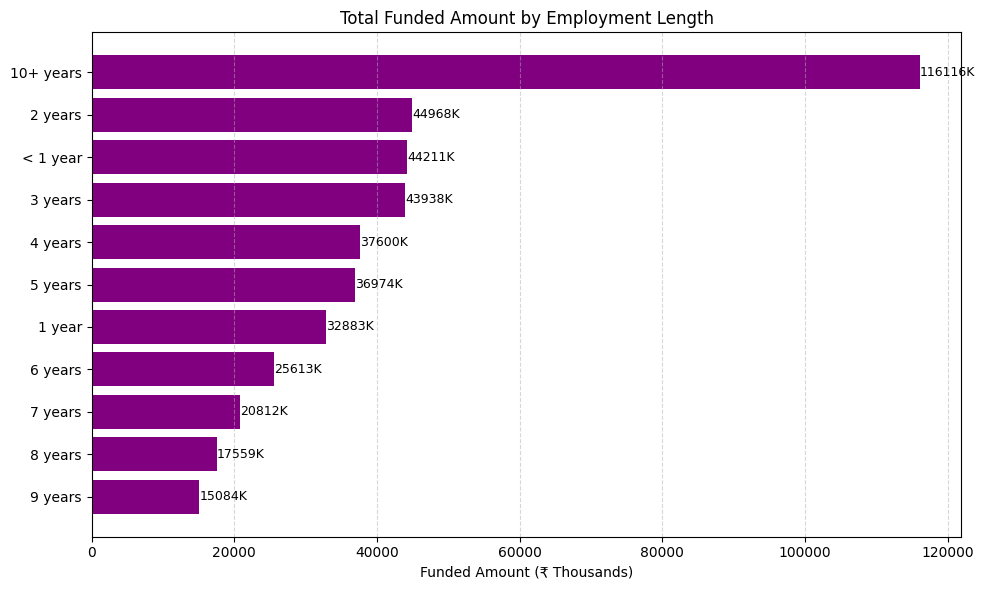

In [19]:
# Grouping by employment length for total funded amount
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000
emp_funding_thousands = emp_funding

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding_thousands.index, emp_funding_thousands, color='purple')

# Annotating each bar with value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5,
             bar.get_y() + bar.get_height() / 2,
             f"{width:.0f}K",
             va='center', fontsize=9)

plt.xlabel('Funded Amount (₹ Thousands)')
plt.title('Total Funded Amount by Employment Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **Loan Purpose By Total Funded Amount**

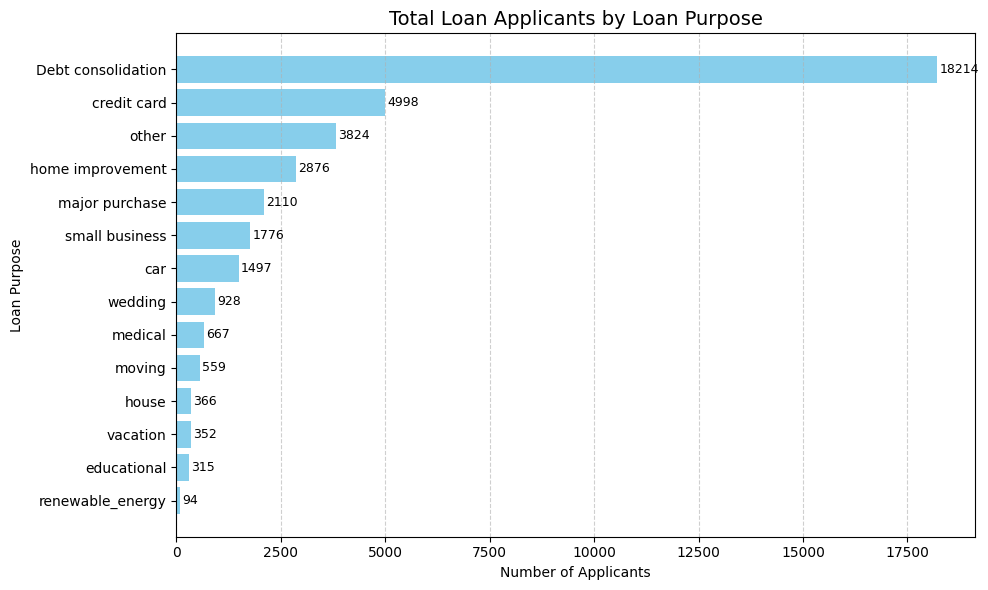

In [20]:
# Grouping by loan purpose for total number of applicants
purpose_applicants = df.groupby('purpose')['loan_amount'].count().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_applicants.index, purpose_applicants.values, color='skyblue')

# Annotating each bar with number of applicants
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50,               # small offset for clarity
             bar.get_y() + bar.get_height() / 2,
             f"{int(width)}",
             va='center', fontsize=9)

plt.title('Total Loan Applicants by Loan Purpose', fontsize=14)
plt.xlabel('Number of Applicants')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Home Ownership By Total Funded Amount**

In [21]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1_000_000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership (₹ Millions)'
)

fig.show()